# Network Traffic Data for Intrusion Detection

## Life cycle of Machine learning Project

1.Understanding the Problem Statement 

2.Data Collection

3.Exploratory data analysis

4.Data Cleaning 

5.Data Pre-Processing

6.Model Training
 
7.Choose best model 

# About This Dataset

This dataset is synthetically generated for the analysis and detection of network traffic anomalies and potential cyber-attacks. It simulates various types of network flows, capturing both normal and malicious behaviors to help identify potential intrusions in a network environment.

# Dataset Purpose

The dataset is designed for use in developing and evaluating Intrusion Detection Systems (IDS), particularly for detecting Distributed Denial of Service (DDoS) attacks. By containing both normal traffic and traffic labeled as attacks, it offers an opportunity for machine learning models to be trained and tested on real-world scenarios where distinguishing between normal and malicious traffic is essential for maintaining network security.

# Key Features

•	Duration: The total time (in seconds) that the network flow lasts.

•	Protocol: The communication protocol used (e.g., TCP, UDP, ICMP), which can affect the nature of the traffic.

•	SourceIP: The IP address of the originating machine in the network flow.

•	DestinationIP: The IP address of the receiving machine.

•	SourcePort: The port number on the source machine where the flow originates.

•	DestinationPort: The port number on the destination machine receiving the flow.

•	PacketCount: The number of packets exchanged during the flow.

•	ByteCount: The total bytes exchanged in the flow.

•	Label: A categorical feature indicating whether the traffic is normal or an attack (binary classification).

# 1. Loading and Preprocessing the Data

In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [7]:
# Load the dataset
# Assuming the file is named 'network_traffic.csv'
df = pd.read_csv('network_traffic_data.csv')

# Display the first 5 rows
df.head()

,Duration,Protocol,SourceIP,DestinationIP,SourcePort,DestinationPort,PacketCount,ByteCount,Label
0,24.077749,TCP,192.168.1.239,192.168.1.234,8055,1,827,198244,Attack
1,97.252384,ICMP,192.168.1.176,192.168.1.82,63174,687,673,1202973,Normal
2,85.842654,TCP,192.168.1.120,192.168.1.113,30873,570,319,984671,Attack
3,79.196991,UDP,192.168.1.212,192.168.1.140,4410,683,375,36284,Normal
4,34.928018,TCP,192.168.1.17,192.168.1.223,4702,989,465,817463,Normal


In [8]:
# Basic info
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         2000 non-null   float64
 1   Protocol         2000 non-null   object 
 2   SourceIP         2000 non-null   object 
 3   DestinationIP    2000 non-null   object 
 4   SourcePort       2000 non-null   int64  
 5   DestinationPort  2000 non-null   int64  
 6   PacketCount      2000 non-null   int64  
 7   ByteCount        2000 non-null   int64  
 8   Label            2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,Duration,SourcePort,DestinationPort,PacketCount,ByteCount
count,2000.000000,2000.000000,2000.00000,2000.000000,2.000000e+03
mean,50.294689,32897.035000,519.86550,490.051000,7.232092e+05
std,28.837966,18477.821753,293.19047,290.012322,4.338501e+05
min,0.014723,1098.000000,1.00000,1.000000,1.304000e+03
25%,24.476457,16770.750000,261.00000,230.000000,3.484270e+05
50%,50.818980,32930.500000,533.50000,489.000000,7.076935e+05
75%,75.059327,49061.250000,768.00000,741.250000,1.105676e+06
max,99.995156,65461.000000,1022.00000,999.000000,1.499009e+06


In [9]:
# Drop IP columns since they're categorical and not useful for training
df = df.drop(['SourceIP', 'DestinationIP'], axis=1)

In [10]:
df.head()

,Duration,Protocol,SourcePort,DestinationPort,PacketCount,ByteCount,Label
0,24.077749,TCP,8055,1,827,198244,Attack
1,97.252384,ICMP,63174,687,673,1202973,Normal
2,85.842654,TCP,30873,570,319,984671,Attack
3,79.196991,UDP,4410,683,375,36284,Normal
4,34.928018,TCP,4702,989,465,817463,Normal


In [11]:
# Encode the categorical 'Protocol' column
le = LabelEncoder()
df['Protocol'] = le.fit_transform(df['Protocol'])

In [13]:
# Encode the target label (normal vs attack)
df['Label'] = le.fit_transform(df['Label'])


In [14]:
df.head(5)

,Duration,Protocol,SourcePort,DestinationPort,PacketCount,ByteCount,Label
0,24.077749,1,8055,1,827,198244,0
1,97.252384,0,63174,687,673,1202973,1
2,85.842654,1,30873,570,319,984671,0
3,79.196991,2,4410,683,375,36284,1
4,34.928018,1,4702,989,465,817463,1


In [15]:
# Scale numerical columns
num_cols = ['Duration', 'SourcePort', 'DestinationPort', 'PacketCount', 'ByteCount']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
df.head()

,Duration,Protocol,SourcePort,DestinationPort,PacketCount,ByteCount,Label
0,-0.909339,1,-1.344761,-1.770164,1.162134,-1.210318,0
1,1.628736,0,1.638967,0.570197,0.630990,1.106105,1
2,1.232988,1,-0.109566,0.171039,-0.589953,0.602806,0
3,1.002482,2,-1.542074,0.556550,-0.396810,-1.583720,1
4,-0.532996,1,-1.526267,1.600502,-0.086401,0.217304,1


# 2. Exploratory Data Analysis (EDA)

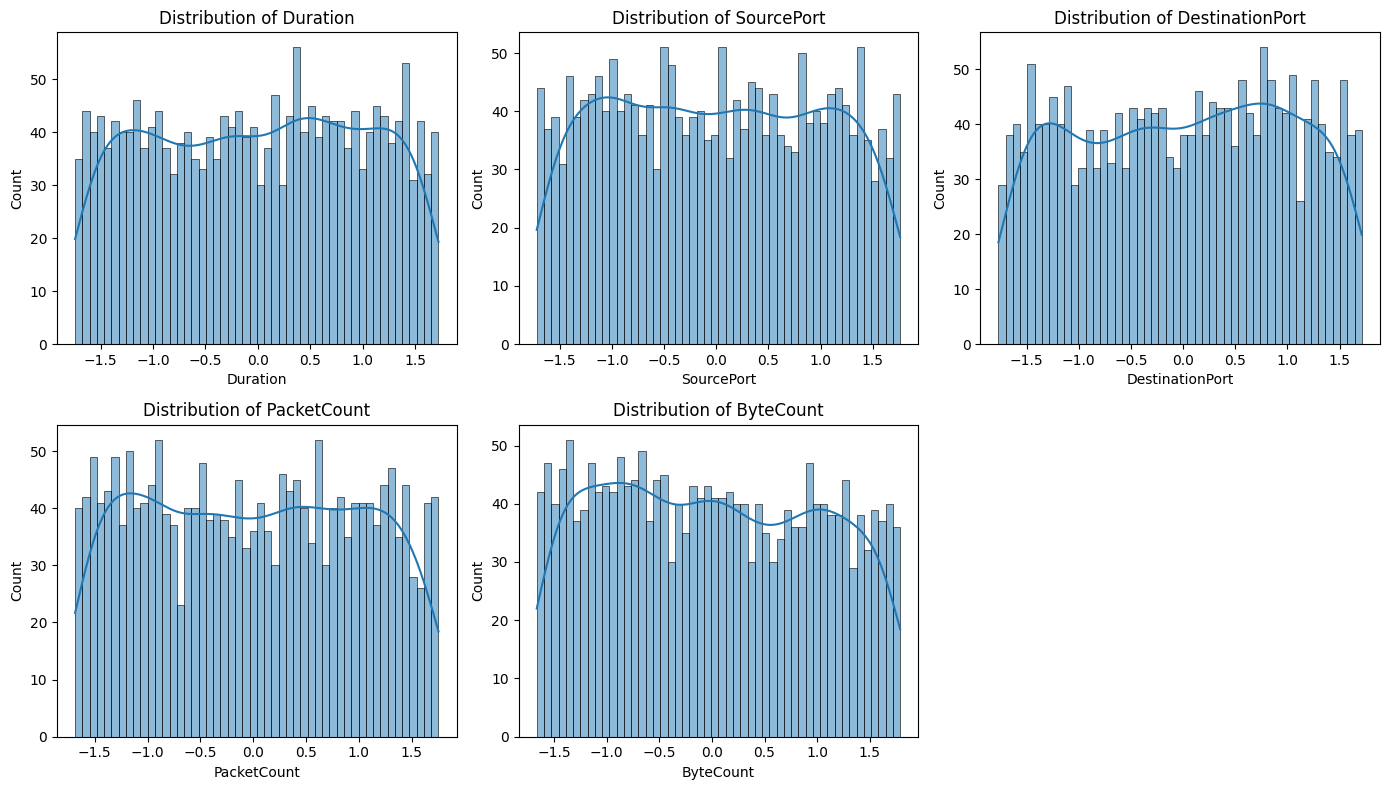

In [17]:
# Plot the distribution of the numerical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

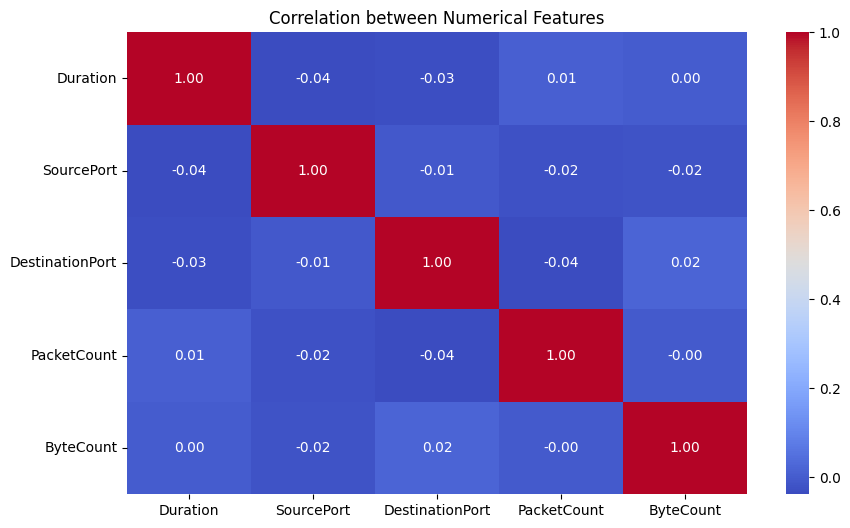

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

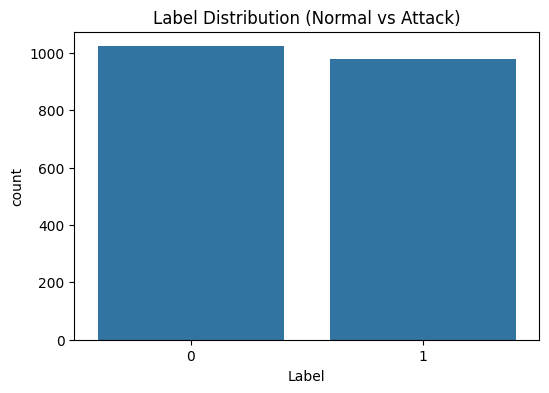

In [19]:
# Label distribution (normal vs attack)
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Label Distribution (Normal vs Attack)')
plt.show()

# UNDERSTANDINGS
1.	Class Imbalance:
•	The dataset exhibits a significant class imbalance, with the “Normal” class being approximately 10 times more prevalent than the “Attack” class. This imbalance can potentially impact the performance of machine learning models, as they may become biased towards predicting the majority class.

2.	Impact on Model Training:
•	Due to the high number of instances in the “Normal” class, models trained on this dataset may have difficulty accurately identifying and predicting the “Attack” class. The risk is that the model may achieve high overall accuracy by predominantly predicting the majority class while performing poorly on the minority class.
	
3.	Potential Strategies:
•	Resampling Techniques: Use oversampling methods (e.g., SMOTE) to increase the number of “Attack” instances or undersampling methods to reduce the number of “Normal” instances.

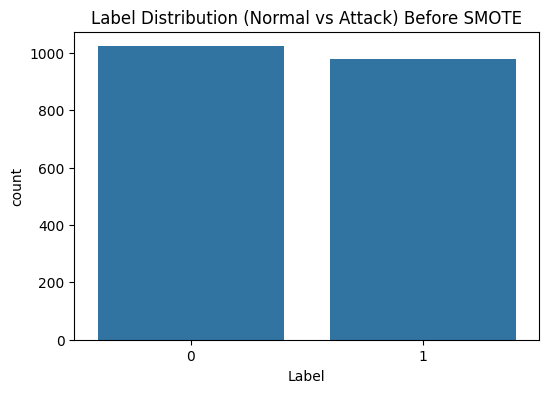

In [21]:
from imblearn.over_sampling import SMOTE
# Assuming df is your DataFrame and has been defined previously
# Visualize the label distribution before applying SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Label Distribution (Normal vs Attack) Before SMOTE')
plt.show()

In [22]:
# Separate features and target variable
X = df.drop(columns=['Label'])  # Features
y = df['Label']                  # Target variable


In [23]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [24]:
# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
# Create a new DataFrame for the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Label'] = y_resampled


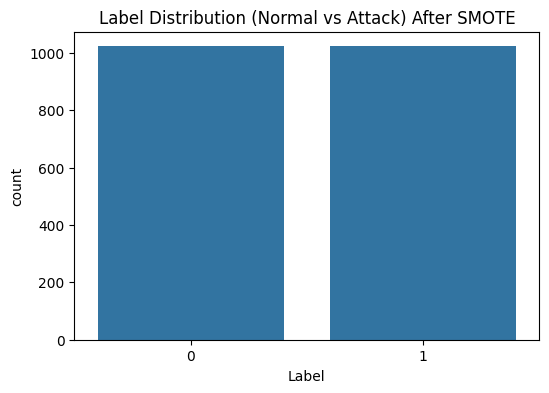

In [26]:

# Visualize the label distribution after applying SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df_resampled)
plt.title('Label Distribution (Normal vs Attack) After SMOTE')
plt.show()

# Conclusion for EDA After Applying SMOTE

1.	Initial Imbalance:
•	At first, we had 10,200 “Normal” instances and only 990 “Attack” instances. This imbalance could make our model biased toward predicting “Normal.”
	
2.	SMOTE Application:
•	We used SMOTE to generate synthetic “Attack” instances, bringing both classes to 10,200 instances each. Now, they are balanced.

3.	Better Model Training:
•	With balanced data, the model can learn equally from both classes, improving its ability to detect attacks accurately.
	
4.	Evaluation Metrics:
•	Now we can use standard metrics like accuracy, precision, and recall to assess the model’s performance without bias.
	
5.	Modeling Options:
•	We can explore various modeling techniques like logistic regression and random forests since the classes are balanced.
	
6.	Feature Analysis:
•	Further analysis can help us understand which features are most important in distinguishing between “Normal” and “Attack.”
	
7.	Monitoring Performance:
•	We need to keep an eye on the model’s performance in real-world situations, as the types of attacks may change over time.

# we fixed the class imbalance using SMOTE, which allows our model to learn better and predict attacks more accurately. With both classes balanced, we can now confidently build and evaluate our model.